In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import numpy as np
import matplotlib.font_manager as fm

# 폰트 설정
#font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_path = '/Users/ldm/Library/Fonts/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False


# Add font
fm.fontManager.addfont('/Users/ldm/Library/Fonts/NanumGothic.ttf')

# Set as default font
plt.rcParams['font.family'] = 'NanumGothic'

/opt/anaconda3/envs/irt_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8345 (\N{LATIN SUBSCRIPT SMALL LETTER N}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/irt_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 7522 (\N{LATIN SUBSCRIPT SMALL LETTER I}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


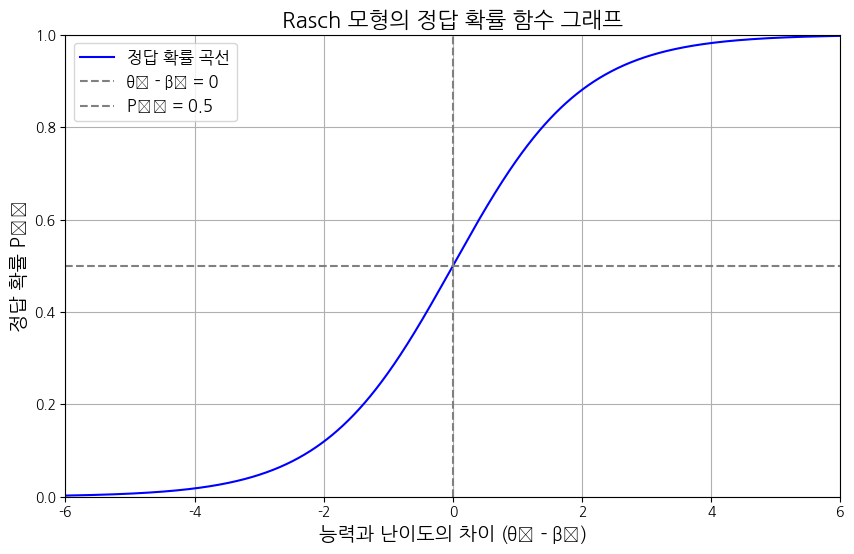

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 능력과 난이도의 차이 범위 설정 (-6부터 6까지 1000개의 점 생성)
theta_minus_beta = np.linspace(-6, 6, 1000)

# 정답 확률 계산 (로지스틱 함수 사용)
P_ni = np.exp(theta_minus_beta) / (1 + np.exp(theta_minus_beta))

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 정답 확률 곡선 그리기
plt.plot(theta_minus_beta, P_ni, label='정답 확률 곡선', color='blue')

# 그래프 제목과 축 레이블 설정
plt.title('Rasch 모형의 정답 확률 함수 그래프', fontsize=16)
plt.xlabel('능력과 난이도의 차이 (θₙ - βᵢ)', fontsize=14)
plt.ylabel('정답 확률 Pₙᵢ', fontsize=14)

# 축 범위 설정
plt.xlim(-6, 6)
plt.ylim(0, 1)

# 격자선 추가
plt.grid(True)

# θₙ - βᵢ = 0에서 수직선 그리기 (정답 확률 50% 지점)
plt.axvline(x=0, color='gray', linestyle='--', label='θₙ - βᵢ = 0')

# 정답 확률 50% 지점에 수평선 그리기
plt.axhline(y=0.5, color='gray', linestyle='--', label='Pₙᵢ = 0.5')

# 범례 표시
plt.legend(fontsize=12)

# 그래프 보여주기
plt.show()


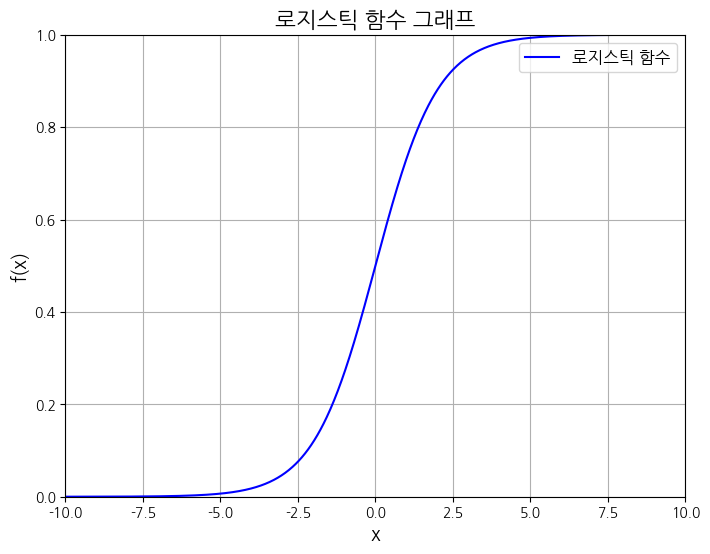

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# x 값의 범위 설정 (-10에서 10까지 1000개의 점)
x = np.linspace(-10, 10, 1000)

# 로지스틱 함수 계산
y = 1 / (1 + np.exp(-x))

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='로지스틱 함수', color='blue')

# 그래프 제목과 축 레이블 설정
plt.title('로지스틱 함수 그래프', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)

# 축 범위 설정
plt.xlim(-10, 10)
plt.ylim(0, 1)

# 격자선 추가
plt.grid(True)

# 범례 표시
plt.legend(fontsize=12)

# 그래프 보여주기
plt.show()


### **1. 문항 특성 곡선 (Item Characteristic Curves, ICCs)**

**설명:**
문항 특성 곡선은 능력 수준(θ)에 따른 각 문항의 정답 확률을 나타냅니다. 이를 통해 문항의 난이도와 변별도를 시각적으로 파악할 수 있습니다.

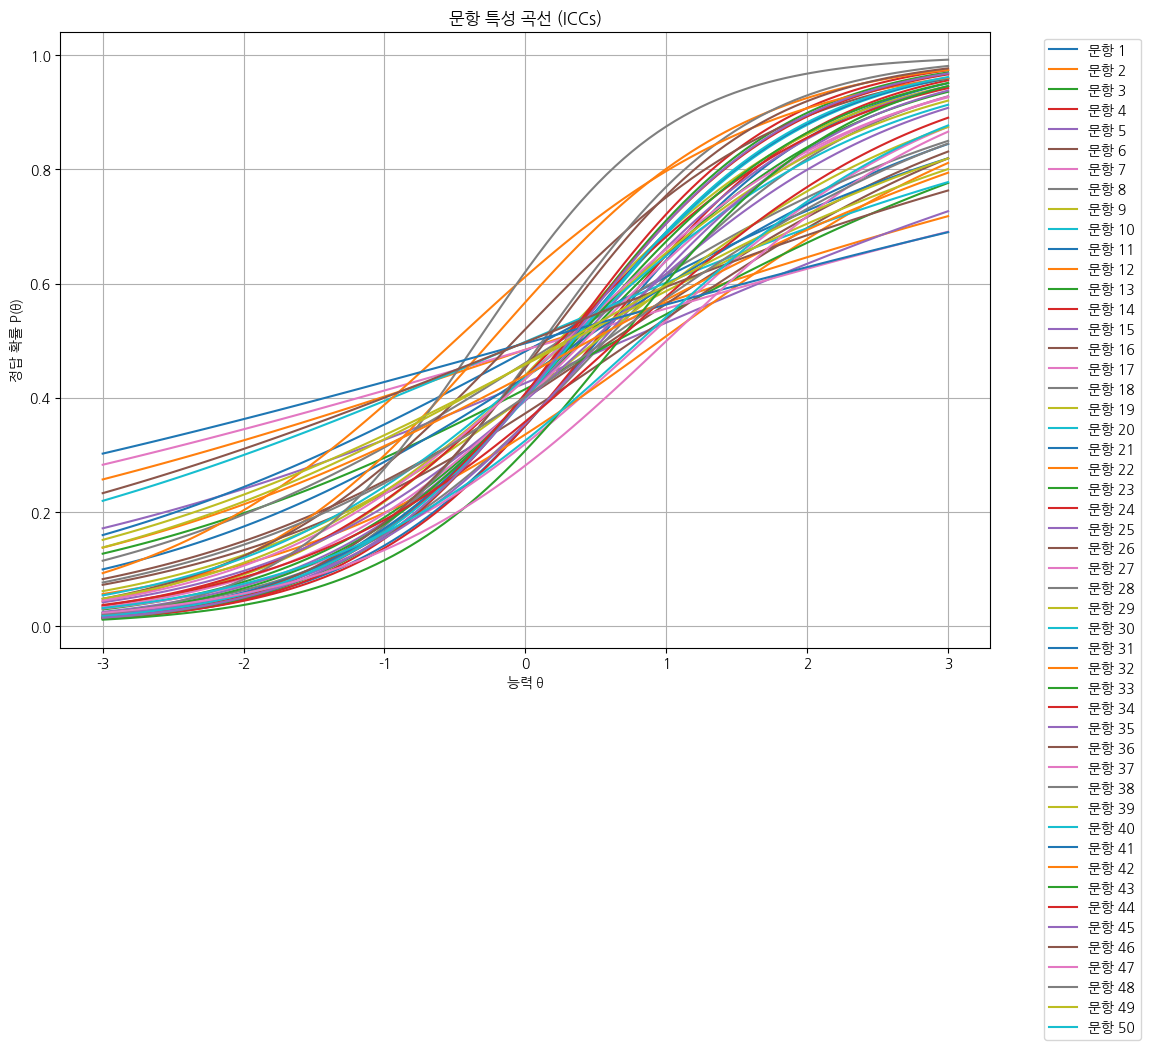

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 저장된 문항 매개변수 로드
item_parameters = pd.read_csv('문항_매개변수.csv', encoding='utf-8-sig')

# 2. 변별도(alpha_est)와 난이도(beta_est) 추출
alpha_est = item_parameters['변별도 (alpha)'].values
beta_est = item_parameters['난이도 (beta)'].values

# 3. 문항 수(n_items) 설정
n_items = len(alpha_est)

# 4. 능력 범위 설정
theta_range = np.linspace(-3, 3, 100)

# 5. 문항 특성 곡선 그리기
plt.figure(figsize=(12, 8))
for i in range(n_items):
    alpha_i = alpha_est[i]
    beta_i = beta_est[i]
    # 각 문항의 정답 확률 계산
    p_theta = 1 / (1 + np.exp(-alpha_i * (theta_range - beta_i)))
    plt.plot(theta_range, p_theta, label=f'문항 {i+1}')
plt.xlabel('능력 θ')
plt.ylabel('정답 확률 P(θ)')
plt.title('문항 특성 곡선 (ICCs)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


### **2. 문항 정보 함수 (Item Information Functions, IIFs)**

**설명:**
문항 정보 함수는 능력 수준에서 각 문항이 제공하는 정보량을 나타냅니다. 변별도가 높은 문항일수록 특정 능력 수준에서 더 많은 정보를 제공합니다.

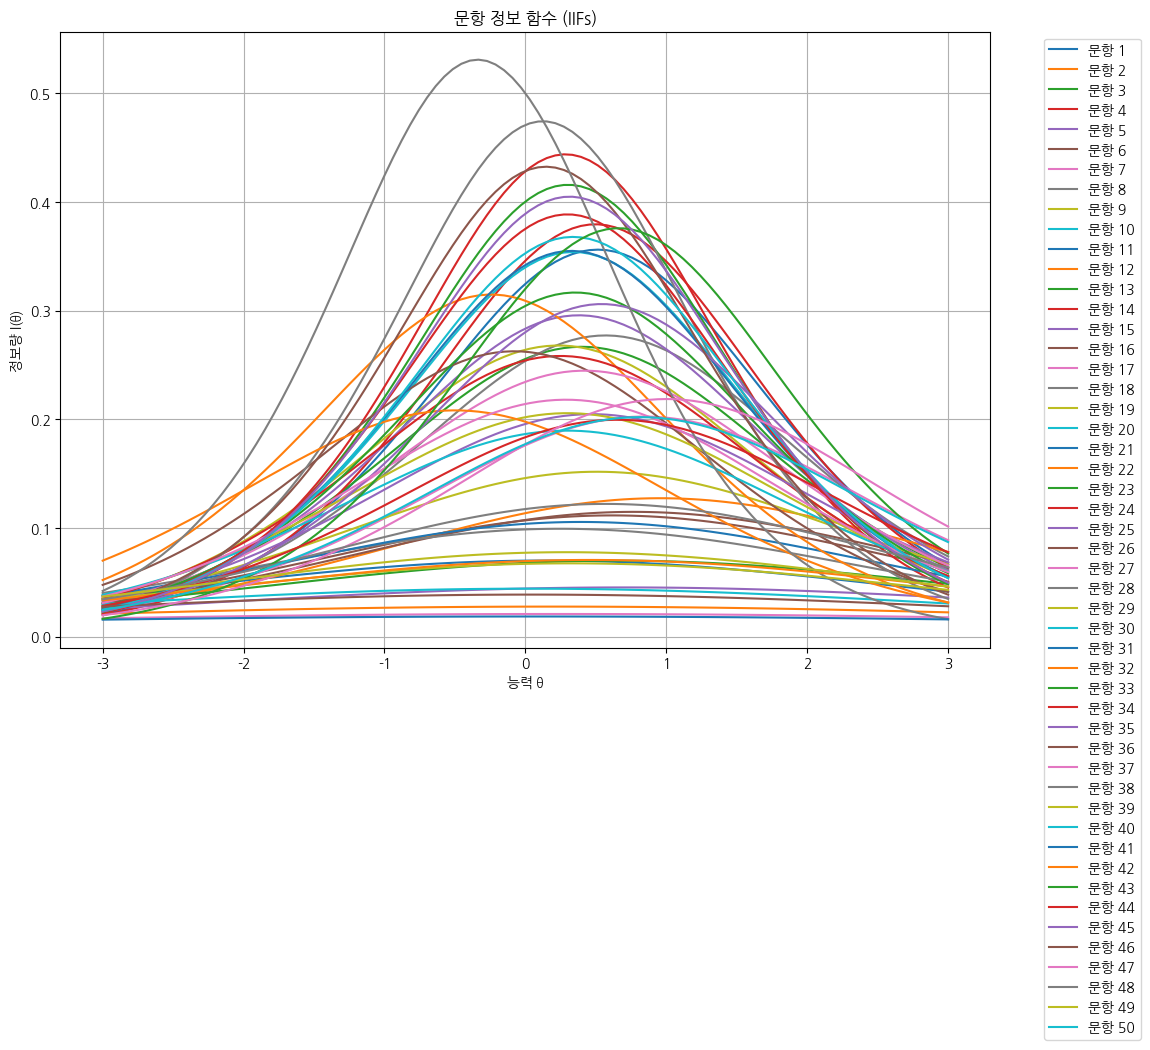

In [9]:
# 문항 정보 함수 그리기
plt.figure(figsize=(12, 8))
for i in range(n_items):
    alpha_i = alpha_est[i]
    beta_i = beta_est[i]
    # 정답 확률 계산
    p_theta = 1 / (1 + np.exp(-alpha_i * (theta_range - beta_i)))
    # 문항 정보량 계산
    info_theta = (alpha_i ** 2) * p_theta * (1 - p_theta)
    plt.plot(theta_range, info_theta, label=f'문항 {i+1}')
plt.xlabel('능력 θ')
plt.ylabel('정보량 I(θ)')
plt.title('문항 정보 함수 (IIFs)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


### **3. 검사 특성 곡선 (Test Characteristic Curve, TCC)**

**설명:**
검사 특성 곡선은 능력 수준에 따른 총점의 기대값을 보여줍니다. 모든 문항의 문항 특성 곡선을 합산하여 계산합니다.

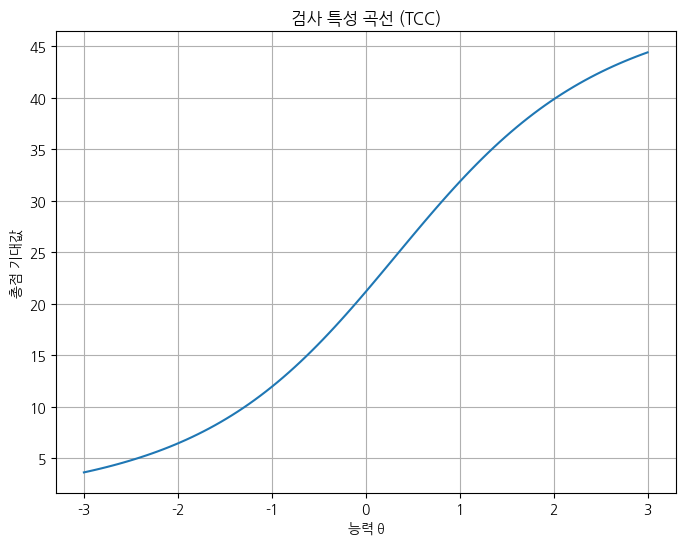

In [10]:
# 총점 기대값 계산
tcc = np.zeros_like(theta_range)
for i in range(n_items):
    alpha_i = alpha_est[i]
    beta_i = beta_est[i]
    p_theta = 1 / (1 + np.exp(-alpha_i * (theta_range - beta_i)))
    tcc += p_theta

plt.figure(figsize=(8, 6))
plt.plot(theta_range, tcc)
plt.xlabel('능력 θ')
plt.ylabel('총점 기대값')
plt.title('검사 특성 곡선 (TCC)')
plt.grid(True)
plt.show()


### **4. 검사 정보 함수 (Test Information Function, TIF)**

**설명:**
검사 정보 함수는 능력 수준에서 전체 검사가 제공하는 총 정보량을 나타냅니다. 모든 문항의 정보 함수를 합산하여 계산합니다.

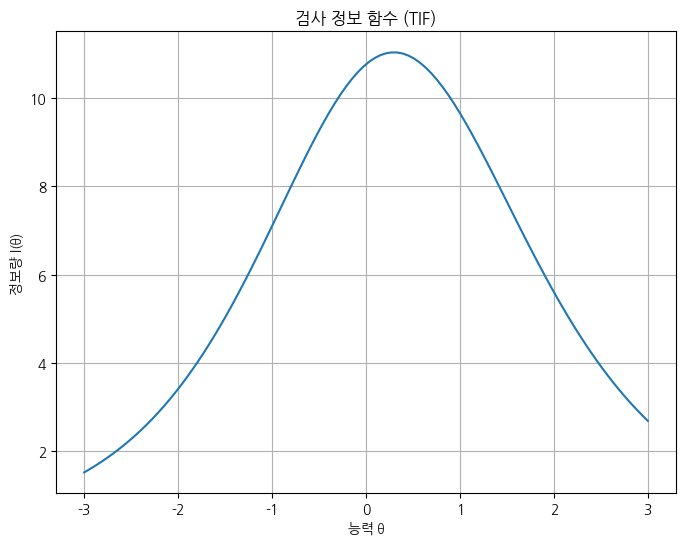

In [11]:
# 총 정보량 계산
tif = np.zeros_like(theta_range)
for i in range(n_items):
    alpha_i = alpha_est[i]
    beta_i = beta_est[i]
    p_theta = 1 / (1 + np.exp(-alpha_i * (theta_range - beta_i)))
    info_theta = (alpha_i ** 2) * p_theta * (1 - p_theta)
    tif += info_theta

plt.figure(figsize=(8, 6))
plt.plot(theta_range, tif)
plt.xlabel('능력 θ')
plt.ylabel('정보량 I(θ)')
plt.title('검사 정보 함수 (TIF)')
plt.grid(True)
plt.show()


### **5. 피험자-문항 맵 (Wright Map)**

**설명:**
피험자의 능력 분포와 문항의 난이도 분포를 하나의 스케일에 나타내어 비교합니다. 이를 통해 문항이 피험자 집단에 적절한 난이도를 가지고 있는지 파악할 수 있습니다.

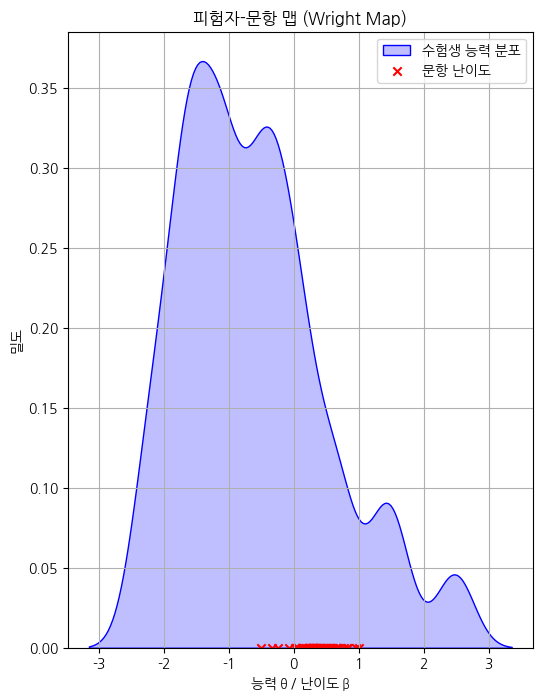

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 저장된 수험생 능력 추정치 로드
examinee_parameters = pd.read_csv('수험생_능력_추정치.csv', encoding='utf-8-sig')
theta_est = examinee_parameters['능력 추정치 (theta)'].values

# 2. 저장된 문항 매개변수 로드
item_parameters = pd.read_csv('문항_매개변수.csv', encoding='utf-8-sig')
beta_est = item_parameters['난이도 (beta)'].values

# 3. 문항 수 및 수험생 수 설정
n_items = len(beta_est)
n_examinees = len(theta_est)

# 4. Wright Map 그리기
plt.figure(figsize=(6, 8))

# 피험자 능력 분포 (밀도 곡선)
sns.kdeplot(theta_est, fill=True, label='수험생 능력 분포', color='blue', bw_adjust=0.5)

# 문항 난이도 위치 표시
plt.scatter(beta_est, [0]*n_items, color='red', marker='x', label='문항 난이도')

# 그래프 설정
plt.xlabel('능력 θ / 난이도 β')
plt.ylabel('밀도')
plt.title('피험자-문항 맵 (Wright Map)')
plt.legend()
plt.grid(True)
plt.show()


### **6. 모수 분포 히스토그램**

**설명:**
추정된 문항 변별도, 난이도, 피험자 능력의 분포를 히스토그램으로 나타냅니다.

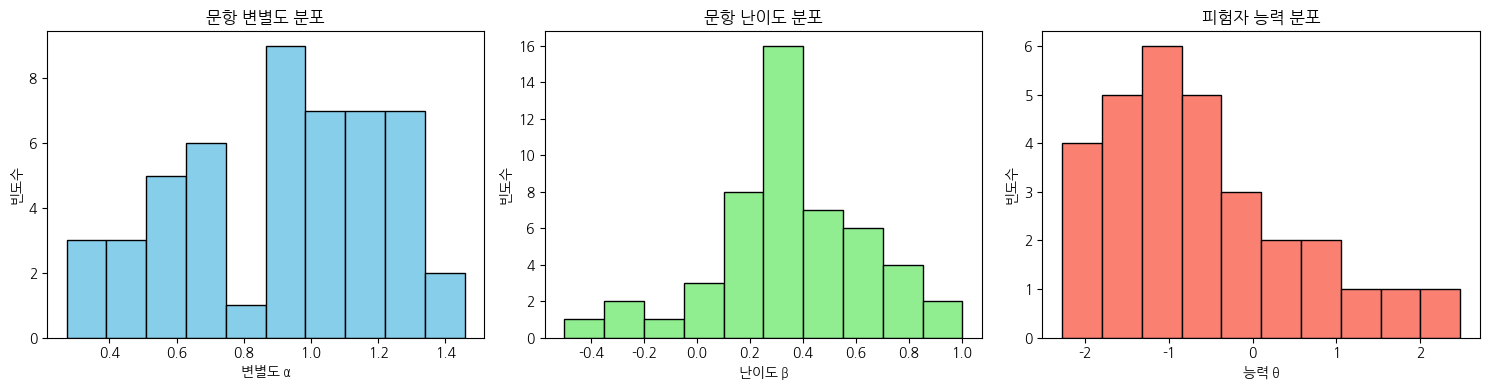

In [15]:
plt.figure(figsize=(15, 4))

# 문항 변별도 분포
plt.subplot(1, 3, 1)
plt.hist(alpha_est, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('변별도 α')
plt.ylabel('빈도수')
plt.title('문항 변별도 분포')

# 문항 난이도 분포
plt.subplot(1, 3, 2)
plt.hist(beta_est, bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('난이도 β')
plt.ylabel('빈도수')
plt.title('문항 난이도 분포')

# 피험자 능력 분포
plt.subplot(1, 3, 3)
plt.hist(theta_est, bins=10, color='salmon', edgecolor='black')
plt.xlabel('능력 θ')
plt.ylabel('빈도수')
plt.title('피험자 능력 분포')

plt.tight_layout()
plt.show()


### **7. 잔차 분석 그래프**

**설명:**
모델이 관찰된 데이터에 얼마나 잘 맞는지 평가하기 위해 잔차를 시각화합니다.

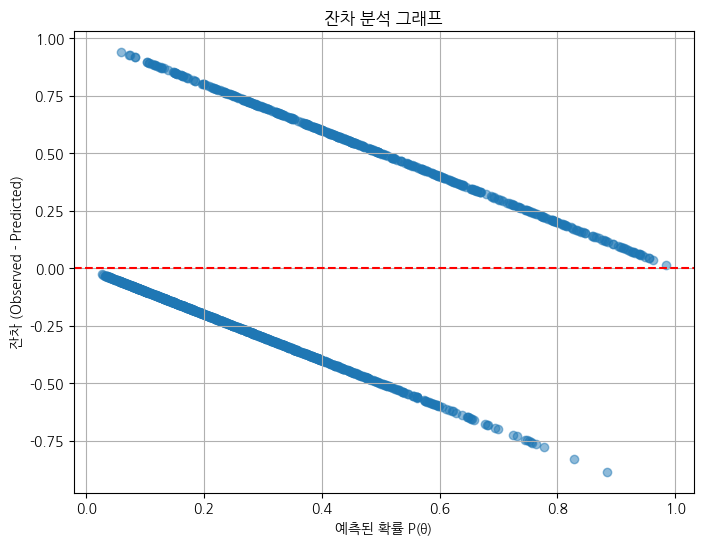

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 저장된 수험생 능력 추정치 로드
examinee_parameters = pd.read_csv('수험생_능력_추정치.csv', encoding='utf-8-sig')
theta_est = examinee_parameters['능력 추정치 (theta)'].values

# 2. 저장된 문항 매개변수 로드
item_parameters = pd.read_csv('문항_매개변수.csv', encoding='utf-8-sig')
alpha_est = item_parameters['변별도 (alpha)'].values
beta_est = item_parameters['난이도 (beta)'].values

# 3. 응답 데이터 로드
# 이전에 사용한 응답 데이터를 로드합니다.
df = pd.read_csv('응답_데이터.csv', encoding='utf-8')

# 응답 데이터를 처리하여 numpy 배열로 변환
def ox_to_binary(ox_string):
    return [1 if char == 'O' else 0 for char in ox_string]

df['responses'] = df['OX리스트'].apply(ox_to_binary)
response_data = pd.DataFrame(df['responses'].tolist())
data = response_data.values

# 4. 수험생 수와 문항 수 설정
n_examinees, n_items = data.shape

# 5. 관찰된 데이터와 예측된 확률 계산
observed = data.flatten()

# 각 피험자에 대한 p값 계산
p_est = []
for i in range(n_examinees):
    theta_i = theta_est[i]
    # 각 문항에 대한 정답 확률 계산
    p_i = 1 / (1 + np.exp(-alpha_est * (theta_i - beta_est)))
    p_est.append(p_i)

p_est = np.array(p_est).flatten()

# 6. 잔차 계산
residuals = observed - p_est

# 7. 잔차 분석 그래프 그리기
plt.figure(figsize=(8, 6))
plt.scatter(p_est, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('예측된 확률 P(θ)')
plt.ylabel('잔차 (Observed - Predicted)')
plt.title('잔차 분석 그래프')
plt.grid(True)
plt.show()


### **8. 실제 총점과 예측 총점 비교**

**설명:**
피험자의 실제 총점과 모델에 의해 예측된 총점을 비교하여 모델의 적합성을 평가합니다.

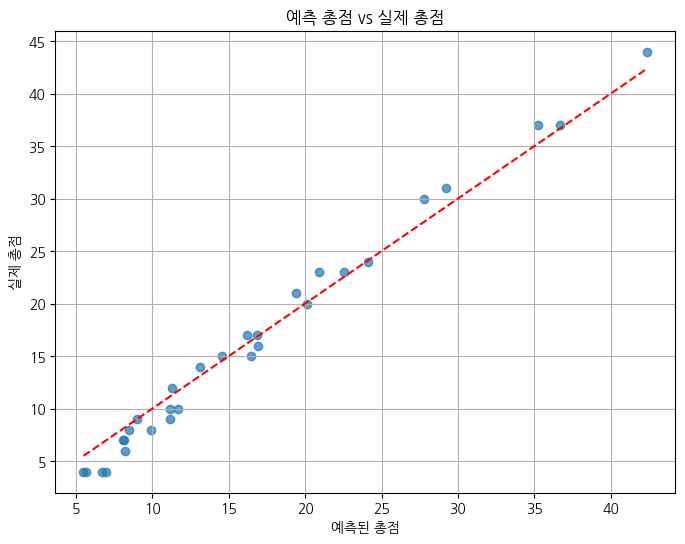

In [17]:
# 실제 총점 계산
actual_scores = data.sum(axis=1)

# 예측된 총점 계산
expected_scores = []
for i in range(n_examinees):
    theta_i = theta_est[i]
    p_i = 1 / (1 + np.exp(-alpha_est * (theta_i - beta_est)))
    expected_scores.append(p_i.sum())
expected_scores = np.array(expected_scores)

plt.figure(figsize=(8, 6))
plt.scatter(expected_scores, actual_scores, alpha=0.7)
plt.plot([expected_scores.min(), expected_scores.max()],
         [expected_scores.min(), expected_scores.max()], 'r--')
plt.xlabel('예측된 총점')
plt.ylabel('실제 총점')
plt.title('예측 총점 vs 실제 총점')
plt.grid(True)
plt.show()


### **9. 추정된 능력에 따른 문항별 정답 확률 히트맵**

**설명:**
피험자의 능력과 문항의 난이도를 고려하여 각 피험자가 각 문항을 맞출 확률을 히트맵으로 시각화합니다.

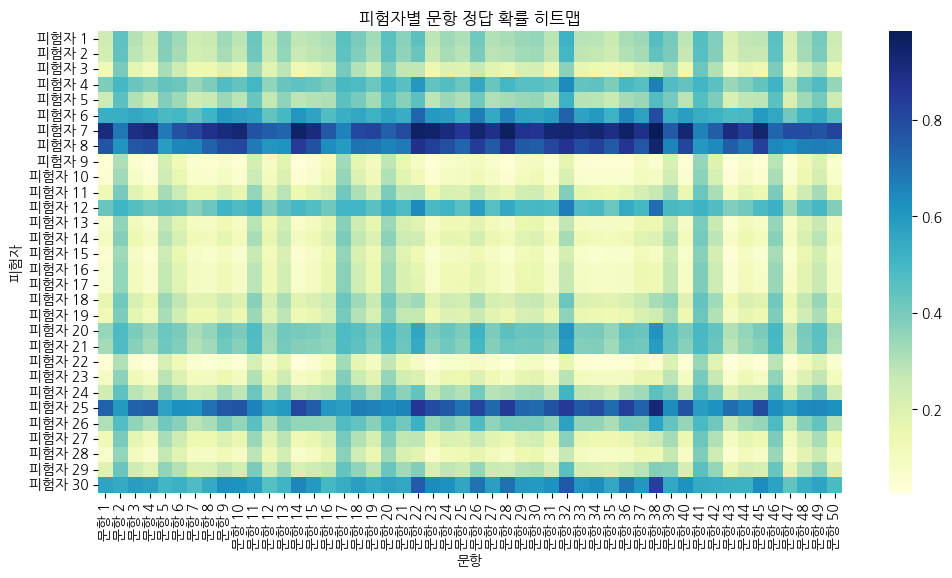

In [18]:
import seaborn as sns

# 피험자-문항별 정답 확률 계산
p_matrix = []
for i in range(n_examinees):
    theta_i = theta_est[i]
    p_i = 1 / (1 + np.exp(-alpha_est * (theta_i - beta_est)))
    p_matrix.append(p_i)
p_matrix = np.array(p_matrix)

plt.figure(figsize=(12, 6))
sns.heatmap(p_matrix, cmap='YlGnBu', xticklabels=[f'문항 {i+1}' for i in range(n_items)],
            yticklabels=[f'피험자 {i+1}' for i in range(n_examinees)])
plt.xlabel('문항')
plt.ylabel('피험자')
plt.title('피험자별 문항 정답 확률 히트맵')
plt.show()


### **10. 피험자 능력과 실제 점수의 상관관계**

**설명:**
추정된 피험자 능력과 실제 점수 간의 상관관계를 확인합니다.

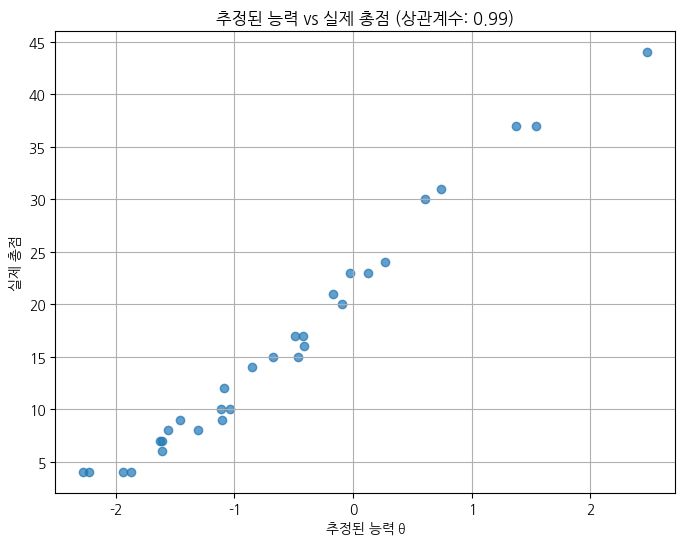

In [19]:
from scipy.stats import pearsonr

# 실제 총점 계산
actual_scores = data.sum(axis=1)

# 상관계수 계산
corr_coef, p_value = pearsonr(theta_est, actual_scores)

plt.figure(figsize=(8, 6))
plt.scatter(theta_est, actual_scores, alpha=0.7)
plt.xlabel('추정된 능력 θ')
plt.ylabel('실제 총점')
plt.title(f'추정된 능력 vs 실제 총점 (상관계수: {corr_coef:.2f})')
plt.grid(True)
plt.show()


In [21]:
# 특정 수험생의 인덱스 (예: 첫 번째 수험생)
examinee_index = 0

# 해당 수험생의 능력 추정치
theta_examinee = theta_est[examinee_index]

print(f"수험생 {df.iloc[examinee_index]['이름']}의 능력 추정치 (θ): {theta_examinee:.2f}")


수험생 Gulnara의 능력 추정치 (θ): -0.42


In [27]:
examinee_index = 0

# 해당 수험생의 실제 응답
actual_responses = data[examinee_index]

# 해당 수험생의 각 문항별 예상 정답 확률
theta_i = theta_est[examinee_index]
p_i = 1 / (1 + np.exp(-alpha_est * (theta_i - beta_est)))

# 결과를 데이터프레임으로 정리
examinee_analysis = pd.DataFrame({
    '문항 번호': np.arange(1, n_items+1),
    '실제 응답': actual_responses,
    '예상 정답 확률': p_i,
    '예상 응답': (p_i >= 0.5).astype(int)
})

print(examinee_analysis)


    문항 번호  실제 응답  예상 정답 확률  예상 응답
0       1      0  0.246382      0
1       2      0  0.449048      0
2       3      0  0.299043      0
3       4      1  0.243486      0
4       5      0  0.382326      0
5       6      0  0.333652      0
6       7      0  0.242712      0
7       8      0  0.260265      0
8       9      0  0.336062      0
9      10      0  0.287296      0
10     11      0  0.425796      0
11     12      0  0.272029      0
12     13      0  0.361960      0
13     14      0  0.280328      0
14     15      0  0.294609      0
15     16      0  0.308407      0
16     17      1  0.453597      0
17     18      0  0.395900      0
18     19      0  0.326274      0
19     20      1  0.453588      0
20     21      0  0.370182      0
21     22      1  0.449306      0
22     23      0  0.281716      0
23     24      0  0.335642      0
24     25      1  0.307983      0
25     26      0  0.412594      0
26     27      1  0.302693      0
27     28      0  0.320147      0
28     29     

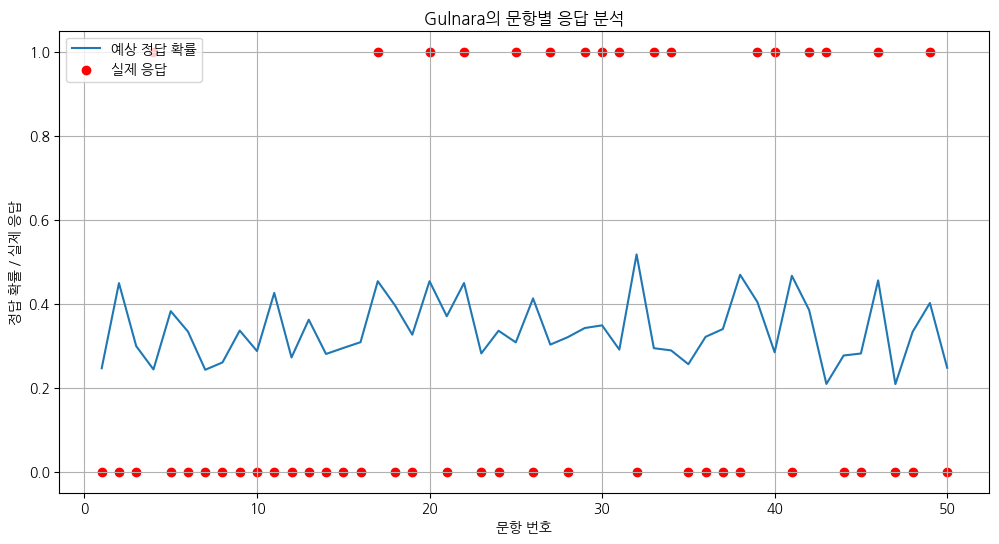

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(examinee_analysis['문항 번호'], examinee_analysis['예상 정답 확률'], label='예상 정답 확률')
plt.scatter(examinee_analysis['문항 번호'], examinee_analysis['실제 응답'], color='red', label='실제 응답')
plt.xlabel('문항 번호')
plt.ylabel('정답 확률 / 실제 응답')
plt.title(f"{df.iloc[examinee_index]['이름']}의 문항별 응답 분석")
plt.legend()
plt.grid(True)
plt.show()


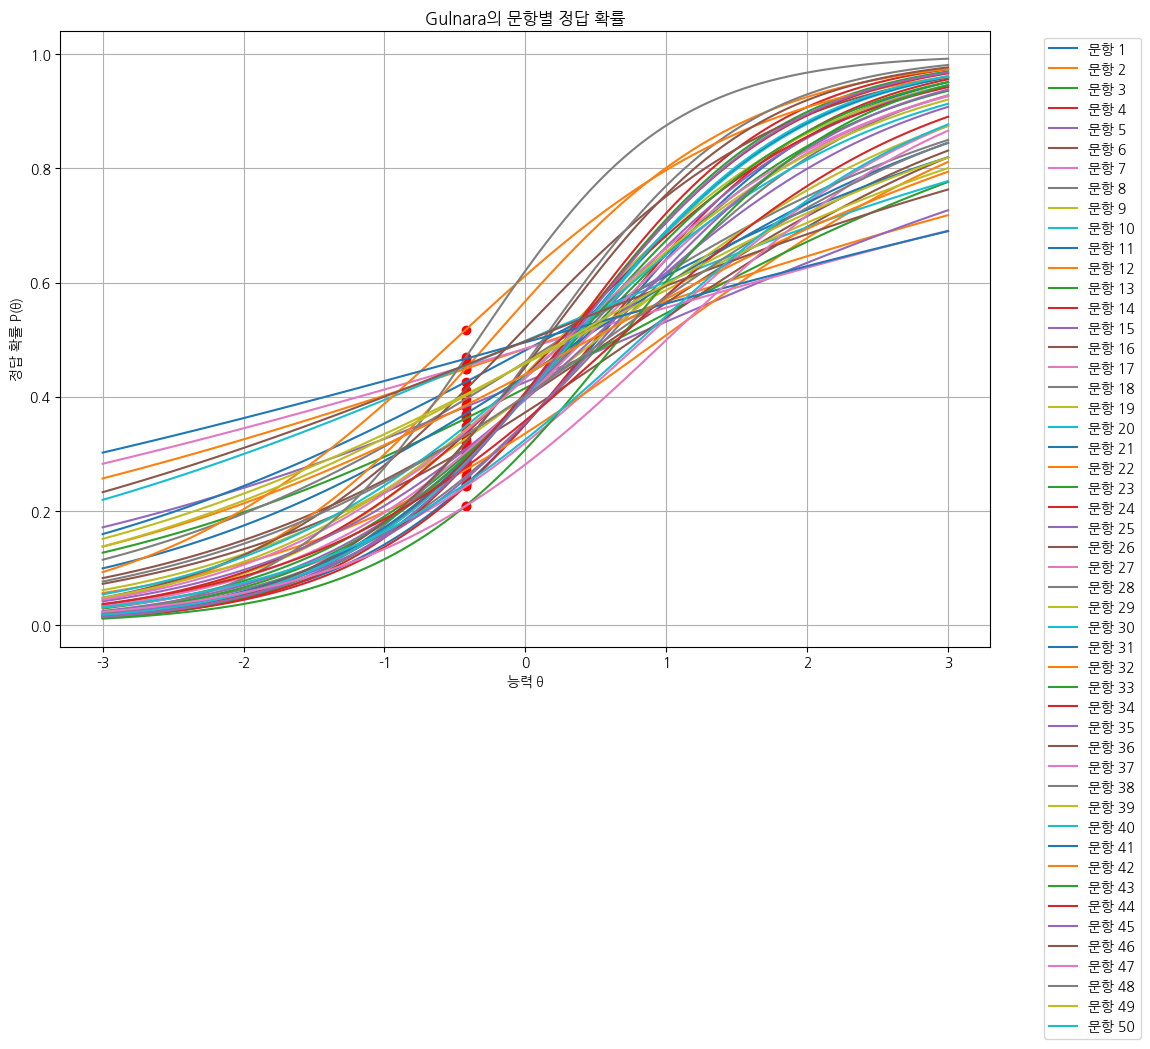

In [29]:
plt.figure(figsize=(12, 8))
for i in range(n_items):
    alpha_i = alpha_est[i]
    beta_i = beta_est[i]
    # 문항 특성 곡선
    theta_range = np.linspace(-3, 3, 100)
    p_theta = 1 / (1 + np.exp(-alpha_i * (theta_range - beta_i)))
    plt.plot(theta_range, p_theta, label=f'문항 {i+1}')
    # 수험생의 능력 수준에서의 정답 확률 표시
    p_examinee = 1 / (1 + np.exp(-alpha_i * (theta_examinee - beta_i)))
    plt.scatter(theta_examinee, p_examinee, color='red')
plt.xlabel('능력 θ')
plt.ylabel('정답 확률 P(θ)')
plt.title(f"{df.iloc[examinee_index]['이름']}의 문항별 정답 확률")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [30]:
# 실제 총점
actual_score = actual_responses.sum()

# 예상 총점
expected_score = p_i.sum()

print(f"{df.iloc[examinee_index]['이름']}의 실제 총점: {actual_score}")
print(f"{df.iloc[examinee_index]['이름']}의 예상 총점: {expected_score:.2f}")


Gulnara의 실제 총점: 17
Gulnara의 예상 총점: 16.85


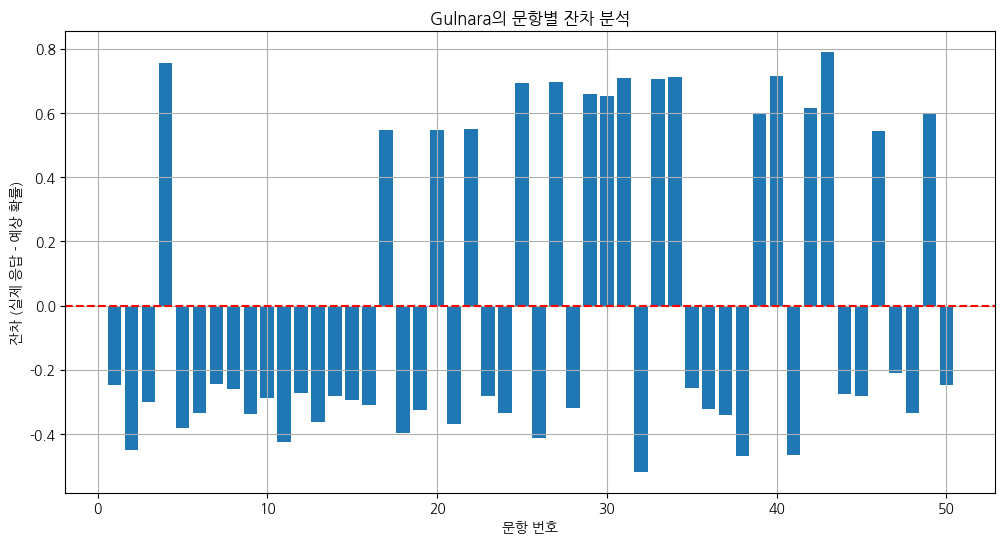

In [31]:
# 잔차 계산
residuals = actual_responses - p_i

# 잔차 데이터프레임 생성
residuals_df = pd.DataFrame({
    '문항 번호': np.arange(1, n_items+1),
    '잔차': residuals
})

# 잔차 시각화
plt.figure(figsize=(12, 6))
plt.bar(residuals_df['문항 번호'], residuals_df['잔차'])
plt.xlabel('문항 번호')
plt.ylabel('잔차 (실제 응답 - 예상 확률)')
plt.title(f"{df.iloc[examinee_index]['이름']}의 문항별 잔차 분석")
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()


물론입니다! 특정 수험생의 능력 추정치(θ)에 대한 95% 신뢰구간(credible interval)을 계산하기 위해서는 해당 수험생의 능력 추정치에 대한 사후 분포 샘플이 필요합니다. 이전에 모델을 실행하면서 생성된 `trace` 객체를 사용하여 신뢰구간을 계산할 수 있습니다.

하지만 이전에 저장한 것은 추정된 평균값(`theta_est`)이고, 신뢰구간을 계산하려면 `trace` 객체를 저장하고 불러와야 합니다. 아래에서는 `trace`를 저장하고, 저장된 `trace`를 불러와서 특정 수험생의 능력 추정치에 대한 신뢰구간을 계산하는 방법을 설명하겠습니다.

---

### **1. 모델 실행 후 `trace` 저장**

모델을 실행한 후 `trace` 객체를 NetCDF 파일로 저장합니다.

```python
# 모델 실행 후 trace 저장
with irt_model:
    trace = pm.sample(1000, tune=1000, cores=2, random_seed=42, return_inferencedata=True)
    # trace를 NetCDF 파일로 저장
    trace.to_netcdf('irt_trace.nc')
```

### **2. 저장된 `trace` 불러오기**

나중에 분석을 계속할 때 저장된 `trace`를 불러옵니다.

```python
import arviz as az

# 저장된 trace 불러오기
trace = az.from_netcdf('irt_trace.nc')
```

### **3. 특정 수험생의 능력 추정치 신뢰구간 계산**

이제 `trace`를 사용하여 특정 수험생의 능력 추정치에 대한 신뢰구간을 계산할 수 있습니다.

```python
import pandas as pd
import pymc as pm

# 수험생 데이터 로드
df = pd.read_csv('응답_데이터.csv', encoding='utf-8')

# 분석할 수험생의 인덱스 설정 (예: 첫 번째 수험생)
examinee_index = 0  # 인덱스는 0부터 시작합니다.

# 수험생의 이름 가져오기
examinee_name = df.iloc[examinee_index]['이름']

# 해당 수험생의 능력 추정치 샘플 추출
theta_samples = trace.posterior['theta'][:, :, examinee_index].values.flatten()

# 능력 추정치의 평균 계산
theta_mean = theta_samples.mean()

# 95% 신뢰구간 계산
theta_hpd = pm.stats.hdi(theta_samples, hdi_prob=0.95)

# 결과 출력
print(f"{examinee_name}의 능력 추정치 (θ): {theta_mean:.2f}")
print(f"95% 신뢰구간: [{theta_hpd[0]:.2f}, {theta_hpd[1]:.2f}]")
```

### **4. 전체 수험생에 대한 능력 추정치와 신뢰구간 계산**

모든 수험생에 대해 능력 추정치와 신뢰구간을 계산하여 데이터프레임으로 저장할 수도 있습니다.

```python
import numpy as np

# 수험생 수
n_examinees = len(df)

# 능력 추정치와 신뢰구간을 저장할 리스트 생성
theta_means = []
theta_lower = []
theta_upper = []

for i in range(n_examinees):
    theta_samples = trace.posterior['theta'][:, :, i].values.flatten()
    theta_mean = theta_samples.mean()
    theta_hpd = pm.stats.hdi(theta_samples, hdi_prob=0.95)
    theta_means.append(theta_mean)
    theta_lower.append(theta_hpd[0])
    theta_upper.append(theta_hpd[1])

# 결과를 데이터프레임으로 저장
examinee_parameters = df[['이름']].copy()
examinee_parameters['능력 추정치 (theta)'] = theta_means
examinee_parameters['95% 신뢰구간 하한'] = theta_lower
examinee_parameters['95% 신뢰구간 상한'] = theta_upper

# 결과 출력
print(examinee_parameters)

# 필요에 따라 CSV 파일로 저장
examinee_parameters.to_csv('수험생_능력_추정치_신뢰구간.csv', index=False, encoding='utf-8-sig')
```

### **5. 특정 수험생의 능력 추정치와 신뢰구간 시각화**

특정 수험생의 능력 추정치와 신뢰구간을 시각적으로 표현할 수 있습니다.

```python
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 8))
plt.errorbar(x=0, y=theta_mean, yerr=[[theta_mean - theta_hpd[0]], [theta_hpd[1] - theta_mean]],
             fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
plt.xticks([])
plt.ylabel('능력 추정치 θ')
plt.title(f"{examinee_name}의 능력 추정치와 95% 신뢰구간")
plt.grid(True)
plt.show()
```

---

### **주의사항**

- **`trace` 객체 저장 및 불러오기**
  - `trace.to_netcdf('filename.nc')`를 사용하여 `trace`를 저장하고, `az.from_netcdf('filename.nc')`를 사용하여 불러옵니다.
  - NetCDF 형식은 대용량의 다차원 배열 데이터를 저장하는 데 적합합니다.

- **PyMC 버전 확인**
  - 이 코드는 PyMC 4.x 버전을 기준으로 작성되었습니다.
  - `pm.sample()` 함수에서 `return_inferencedata=True`를 사용하여 `trace`가 `InferenceData` 객체로 반환됩니다.
  - `trace.posterior['theta']`를 통해 샘플에 접근합니다.

- **수험생 인덱스 주의**
  - Python에서 인덱스는 0부터 시작합니다. 수험생의 순서에 따라 `examinee_index`를 설정하세요.
  - `df.iloc[examinee_index]['이름']`을 사용하여 수험생의 이름을 가져옵니다.

- **신뢰구간 계산**
  - `pm.stats.hdi()` 함수를 사용하여 신뢰구간을 계산합니다.
  - 기본적으로 `hdi_prob=0.95`는 95% 신뢰구간을 의미합니다.

- **추가적인 분석**
  - 수험생별 능력 추정치와 신뢰구간을 비교하여 학습 성과를 평가할 수 있습니다.
  - 신뢰구간이 넓은 경우 해당 수험생의 능력 추정치에 대한 불확실성이 크다는 것을 의미합니다.

### **요약**

- `trace` 객체를 저장하고 불러와서 특정 수험생의 능력 추정치에 대한 신뢰구간을 계산하였습니다.
- 신뢰구간은 모델의 불확실성을 반영하며, 수험생의 능력 추정치에 대한 신뢰도를 평가하는 데 활용됩니다.
- 계산된 결과를 데이터프레임이나 시각화를 통해 확인할 수 있습니다.

---

**추가 도움이 필요하시거나 다른 부분에 대해 궁금한 점이 있으시면 언제든지 말씀해 주세요!**

In [26]:
import arviz as az

# 저장된 trace 불러오기
trace = az.from_netcdf('IRT_trace.nc')

import pandas as pd
import pymc as pm

# 수험생 데이터 로드
df = pd.read_csv('응답_데이터.csv', encoding='utf-8')

# 분석할 수험생의 인덱스 설정 (예: 첫 번째 수험생)
examinee_index = 0  # 인덱스는 0부터 시작합니다.

# 수험생의 이름 가져오기
examinee_name = df.iloc[examinee_index]['이름']

# 해당 수험생의 능력 추정치 샘플 추출
theta_samples = trace.posterior['theta'][:, :, examinee_index].values.flatten()

# 능력 추정치의 평균 계산
theta_mean = theta_samples.mean()

# 95% 신뢰구간 계산
theta_hpd = pm.stats.hdi(theta_samples, hdi_prob=0.95)

# 결과 출력
print(f"{examinee_name}의 능력 추정치 (θ): {theta_mean:.2f}")
print(f"95% 신뢰구간: [{theta_hpd[0]:.2f}, {theta_hpd[1]:.2f}]")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Gulnara의 능력 추정치 (θ): -0.42
95% 신뢰구간: [-1.18, 0.22]


In [27]:
import numpy as np

# 수험생 수
n_examinees = len(df)

# 능력 추정치와 신뢰구간을 저장할 리스트 생성
theta_means = []
theta_lower = []
theta_upper = []

for i in range(n_examinees):
    theta_samples = trace.posterior['theta'][:, :, i].values.flatten()
    theta_mean = theta_samples.mean()
    theta_hpd = pm.stats.hdi(theta_samples, hdi_prob=0.95)
    theta_means.append(theta_mean)
    theta_lower.append(theta_hpd[0])
    theta_upper.append(theta_hpd[1])

# 결과를 데이터프레임으로 저장
examinee_parameters = df[['이름']].copy()
examinee_parameters['능력 추정치 (theta)'] = theta_means
examinee_parameters['95% 신뢰구간 하한'] = theta_lower
examinee_parameters['95% 신뢰구간 상한'] = theta_upper

# 결과 출력
print(examinee_parameters)

# 필요에 따라 CSV 파일로 저장
examinee_parameters.to_csv('수험생_능력_추정치_신뢰구간.csv', index=False, encoding='utf-8-sig')


           이름  능력 추정치 (theta)  95% 신뢰구간 하한  95% 신뢰구간 상한
0     Gulnara       -0.415183    -1.175177     0.224887
1     Dilnoza        0.412009    -0.234627     1.111990
2         Ali       -1.475789    -2.385888    -0.639456
3   Narantuya       -0.238337    -0.929030     0.451137
4     Preecha       -0.092099    -0.784760     0.621440
5        Jose       -0.089267    -0.742675     0.627652
6    Liu Yang        1.477151     0.671450     2.252698
7         Bat        0.118142    -0.556434     0.740303
8   Wang Fang       -0.194171    -0.913652     0.457404
9        Rosa       -2.042089    -3.044360    -1.002234
10  Enkhbayar       -1.661232    -2.628248    -0.798613
11     Li Wei        1.506273     0.787019     2.310028
12       Chai       -1.767053    -2.730807    -0.869613
13       Aziz       -1.489654    -2.347100    -0.638949
14      Hoang       -1.479118    -2.358844    -0.633496
15    Preecha       -2.203005    -3.369505    -1.222356
16       Jose       -1.045063    -1.782299    -0

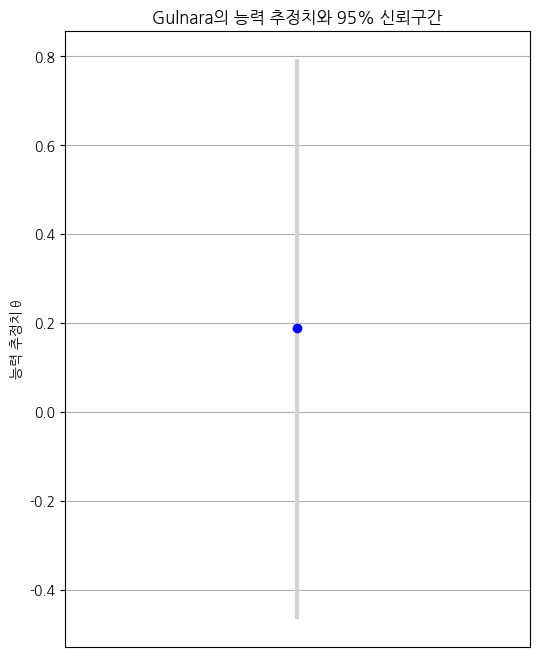

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 8))
plt.errorbar(x=0, y=theta_mean, yerr=[[theta_mean - theta_hpd[0]], [theta_hpd[1] - theta_mean]],
             fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
plt.xticks([])
plt.ylabel('능력 추정치 θ')
plt.title(f"{examinee_name}의 능력 추정치와 95% 신뢰구간")
plt.grid(True)
plt.show()


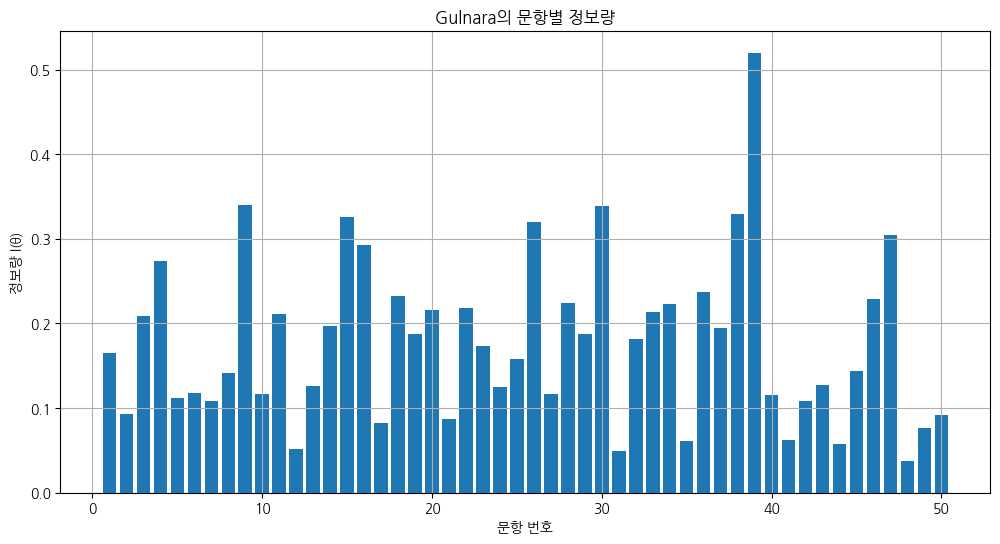

In [29]:
# 수험생의 능력 수준에서의 문항별 정보량 계산
info_i = (alpha_est ** 2) * p_i * (1 - p_i)

# 정보량 데이터프레임 생성
info_df = pd.DataFrame({
    '문항 번호': np.arange(1, n_items+1),
    '정보량': info_i
})

# 정보량 시각화
plt.figure(figsize=(12, 6))
plt.bar(info_df['문항 번호'], info_df['정보량'])
plt.xlabel('문항 번호')
plt.ylabel('정보량 I(θ)')
plt.title(f"{df.iloc[examinee_index]['이름']}의 문항별 정보량")
plt.grid(True)
plt.show()


In [30]:
# 잔차의 표준편차 계산
residuals_std = residuals.std()

# Z-점수 계산
z_scores = residuals / residuals_std

# Z-점수가 절대값 2를 넘는 문항 확인
outliers = examinee_analysis.iloc[np.abs(z_scores) > 2]

print(f"{df.iloc[examinee_index]['이름']}의 이상 응답 문항:")
print(outliers[['문항 번호', '실제 응답', '예상 정답 확률']])


Gulnara의 이상 응답 문항:
Empty DataFrame
Columns: [문항 번호, 실제 응답, 예상 정답 확률]
Index: []


/tmp/ipykernel_3110968/1908471242.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(theta_est, shade=True, label='전체 수험생 능력 분포')


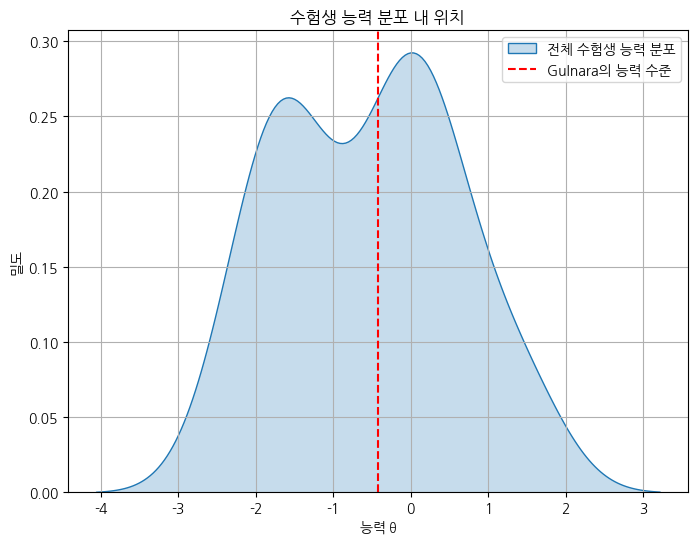

In [31]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.kdeplot(theta_est, shade=True, label='전체 수험생 능력 분포')
plt.axvline(theta_examinee, color='red', linestyle='--', label=f"{df.iloc[examinee_index]['이름']}의 능력 수준")
plt.xlabel('능력 θ')
plt.ylabel('밀도')
plt.title('수험생 능력 분포 내 위치')
plt.legend()
plt.grid(True)
plt.show()
